
  
<h1><center><font size=10>Introduction to LLMs and GenAI</center></font></h1>
<h1><center>Mini Project 1 : Basics of NLP: Text Cleaning & Vectorization</center></h1>

## Problem Statement

### Business Context

In today’s fast-paced e-commerce landscape, customer reviews significantly influence product perception and buying decisions. Businesses must actively monitor customer sentiment to extract insights and maintain a competitive edge. Ignoring negative feedback can lead to serious issues, such as:

* Customer Churn: Unresolved complaints drive loyal customers away, reducing retention and future revenue.

* Reputation Damage: Persistent negative sentiment can erode brand trust and deter new buyers.

* Financial Loss: Declining sales and shifting customer preference toward competitors directly impact profitability.

Actively tracking and addressing customer sentiment is essential for sustained growth and brand strength.

### Problem Definition

A growing e-commerce platform specializing in electronic gadgets collects customer feedback from product reviews, surveys, and social media. With a 200% increase in their customer base over three years and a recent 25% spike in feedback volume, their manual review process is no longer sustainable.

To address this, the company aims to implement an AI-driven solution to automatically classify customer sentiments (positive, negative, or neutral).

As a Data Scientist, your task is to analyze the provided customer reviews—along with their labeled sentiments—and build a predictive model for sentiment classification.

### Data Dictionary

- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

## Importing the necessary libraries

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
# loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [ ]:
# loading data into a pandas dataframe
reviews = pd.read_csv("Product_Reviews.csv")

In [ ]:
# creating a copy of the data
data = reviews.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

### Checking the shape of the dataset

In [ ]:
data.shape

(1007, 3)

* The dataset has 1007 rows and 3 columns.

### Checking for Missing Values

In [ ]:
data.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


* There are no missing values in the data

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(2)

* There are 2 duplicate values in the dataset.
* We'll drop them.

In [ ]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(1005, 3)

## Exploratory Data Analysis (EDA)


#### Distribution of sentiments

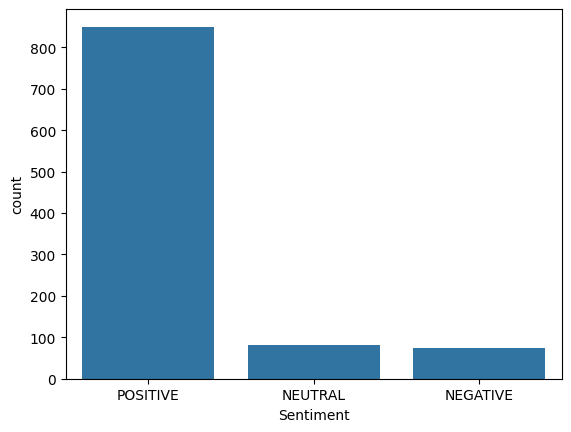

In [ ]:
sns.countplot(data=data, x="Sentiment");

In [ ]:
data['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


- Majority of the reviews are positive (\~85%), followed by neutral reviews (8%), and then the positive reviews (\~7%)

# Recommended Metrics for this Case:
| Metric                               | Why It's Important                                                                  |
| ------------------------------------ | ----------------------------------------------------------------------------------- |
| **Macro F1-Score**                   | Gives equal importance to all 3 classes regardless of imbalance.                    |
| **Per-class Precision & Recall**     | Helps you understand how well the model detects **Neutral** and **Negative** cases. |
| **Confusion Matrix**                 | Shows what types of mistakes your model is making.                                  |
| *(Optional)* **ROC-AUC (per class)** | Can be helpful if you're using probabilistic outputs.                               |


#### Macro F1 vs Micro F1
| Type         | Use When                                              | What It Does                           |
| ------------ | ----------------------------------------------------- | -------------------------------------- |
| **Macro F1** | Treat all classes equally (class-balanced evaluation) | Averages F1 across all classes         |
| **Micro F1** | Use when class sizes vary (class-imbalanced)          | Calculates global counts of TP, FP, FN |


## Text Preprocessing

### Removing special characters from the text

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

- We can observe that the function removed the special characters and retained the alphabets and numbers.

### Lowercasing

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

- We can observe that all the text has now successfully been converted to lower case.

### Removing extra whitespace

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 139 00 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazon i have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as well make yourself happy inspire the reader inside of you,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,i am enjoying it so far great for reading had the o

* We observe that all the stopwords have been removed.

### Stemming/Lemmatization
| Feature                       | **Stemming**                                              | **Lemmatization**                                                |
| ----------------------------- | --------------------------------------------------------- | ---------------------------------------------------------------- |
| **Definition**                | Removes suffixes to reduce words to root form             | Converts word to its **dictionary base form (lemma)**            |
| **Output Example**            | “running” → **run**, “studies” → **studi**                | “running” → **run**, “studies” → **study**                       |
| **Approach**                  | Rule-based truncation (chops off ends)                    | Dictionary + morphological analysis                              |
| **Accuracy**                  | Lower (may produce non-words)                             | Higher (always valid words)                                      |
| **Speed**                     | Fast (simpler rules)                                      | Slower (more complex processing)                                 |
| **Tool Examples**             | `PorterStemmer`, `SnowballStemmer`                        | `WordNetLemmatizer`, `spaCy`                                     |
| **Grammatical Understanding** | ❌ No                                                      | ✅ Yes (considers part-of-speech)                                 |
| **Language Dependency**       | Mostly English, rule-based                                | Requires proper linguistic resources                             |
| **Use Case**                  | When speed is critical and precision isn’t (e.g., search) | When precision matters (e.g., text understanding, summarization) |


#### Summary:
* Stemming: Quick, crude chopping of word ends. Fast but less accurate.
* Lemmatization: Smart, linguistic reduction to base form. Slower but more accurate.



# Comparision of Stemming, Lemmatization and POS(Part of Speech) Lemmatization

In [ ]:
# Stemming using NLTK (PorterStemmer)
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ["running", "studies", "flies", "easily", "happiness"]

for word in words:
    print(f"{word} → {stemmer.stem(word)}")


running → run
studies → studi
flies → fli
easily → easili
happiness → happi


In [ ]:
# Lemmatization using NLTK (WordNetLemmatizer)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet #Downloads the WordNet lexical database.WordNet is adictionary-like database where Words are grouped into sets of synonyms
import nltk

# Make sure to download WordNet resources if not already done
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual WordNet package -This adds language translations, richer word forms, and improved morphological data to WordNet.

lemmatizer = WordNetLemmatizer()

words = ["running", "studies", "flies", "better", "happiness"]

for word in words:
    print(f"{word} → {lemmatizer.lemmatize(word)}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


running → running
studies → study
flies → fly
better → better
happiness → happiness


In [ ]:
wordnet.synonyms('running')

[['run', 'running_game', 'running_play'],
 ['run'],
 [],
 [],
 ['track'],
 ['run'],
 ['break_away',
  'bunk',
  'escape',
  'fly_the_coop',
  'head_for_the_hills',
  'hightail_it',
  'lam',
  'run',
  'run_away',
  'scarper',
  'scat',
  'take_to_the_woods',
  'turn_tail'],
 ['extend', 'go', 'lead', 'pass', 'run'],
 ['operate', 'run'],
 ['go', 'run'],
 ['course', 'feed', 'flow', 'run'],
 ['function', 'go', 'operate', 'run', 'work'],
 ['range', 'run'],
 ['campaign', 'run'],
 ['play', 'run'],
 ['run'],
 ['be_given', 'incline', 'lean', 'run', 'tend'],
 ['run'],
 ['run'],
 ['run'],
 ['run'],
 ['die_hard', 'endure', 'persist', 'prevail', 'run'],
 ['run'],
 ['execute', 'run'],
 ['carry', 'run'],
 ['run'],
 ['draw', 'guide', 'pass', 'run'],
 ['lead', 'run'],
 ['run'],
 ['black_market', 'run'],
 ['run'],
 ['bleed', 'run'],
 ['run'],
 ['run'],
 ['run', 'run_for'],
 ['run'],
 ['consort', 'run'],
 ['run'],
 ['run'],
 ['ply', 'run'],
 ['hunt', 'hunt_down', 'run', 'track_down'],
 ['race', 'run'],
 

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running", pos="v"))
#print(lemmatizer.lemmatize("running", pos="n"))
#print(lemmatizer.lemmatize("running", pos="a"))
#print(lemmatizer.lemmatize("running", pos="r"))
#print(lemmatizer.lemmatize("running", pos="s"))



run


The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([stemmer.stem(word) for word in words])

    return new_text

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# defining a function to perform lemmatization
def apply_lemmatizer(text):
    # Split text into separate words
    words = text.split()

    # Applying the WordNet Lemmatizer on every word of a message and joining the lemmatized words back into a single string
    new_text = ' '.join([lemmatizer.lemmatize(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatizer)

In [ ]:
data.columns

Index(['Product ID', 'Product Review', 'Sentiment', 'cleaned_text',
       'cleaned_text_without_stopwords', 'final_cleaned_text'],
      dtype='object')

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['Product Review','final_cleaned_text']]

,Product Review,final_cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",initially trouble deciding paperwhite voyage review less said thing paperwhite great spending money go voyage fortunately friend owned ended buying paperwhite basis model 300 ppi 80 dollar jump turn pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regret touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry custom may used third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key title fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger game trilogy shall moving onto divergent series soon thing nook hindered past 4 year never inspired pick get hand dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded book ton reading still half battery left well make happy inspire reader inside
2,I am en

## Text Vectorization

* Text vectorization is the process of converting text into numerical format so that machine learning models can understand and work with it.

* Since ML models can't work with raw text (like "cat", "apple", "good"), we transform the text into vectors (arrays of numbers) that represent words, sentences, or documents.

# Common Text Vectorization Methods
| Method                                                 | Description                                                          | Library                   |
| ------------------------------------------------------ | -------------------------------------------------------------------- | ------------------------- |
| **Bag of Words (BoW using CountVectorizer)**                                 | Counts how many times each word appears in the document              | `sklearn`                 |
| **TF-IDF (Term Frequency–Inverse Document Frequency)** | Adjusts BoW by down-weighting common words                           | `sklearn`                 |
| **N-grams**                                            | Captures word combinations like bigrams/trigrams                     | `sklearn`                 |
| **HashingVectorizer**                                  | Like BoW, but hashes tokens into fixed dimensions (memory-efficient) | `sklearn`                 |
| **Word Embeddings (Word2Vec, GloVe)**                  | Maps words to dense, pretrained vectors with meaning                 | `nltk`, `gensim`, `spacy` |





## 1. Bag of Words (BoW) using CountVectorizer
* 🔍 Idea:
Convert each document into a vector based on word counts, ignoring grammar and word order.

* ✅ Steps:
Build vocabulary of all unique words.

Count how many times each word occurs in each sentence.

* 🧠 Vocabulary:
  * Example Corpus (2 sentences)
  1. "I love NLP"
  2. "I love NLP and machine learning"

  ['I', 'love', 'NLP', 'and','I', 'love','machine', 'learning']
  
  (indexed as 0, 1, 2, 3, 4)

* 🧮 Vector Representation:
Each sentence becomes a 5-dimensional vector (length = number of unique words):

| Sentence | I | love | NLP | machine | learning |and|
| -------- | - | ---- | --- | ------- | -------- |---|
| 1        | 1 | 1    | 1   | 0       | 0        |0  |
| 2        | 2 | 2    | 1   | 1       | 1        |1  |


This is the BoW matrix.

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['would' 'write' 'writing' 'wrong' 'xbox' 'year' 'yes' 'yet' 'youll'
 'youtube']


,10,100,11,139,15,16,17,20,2013,2014,...,would,write,writing,wrong,xbox,year,yes,yet,youll,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '139' '15' '16' '17' '20' '2013' '2014']
last 10 words ['would' 'write' 'writing' 'wrong' 'xbox' 'year' 'yes' 'yet' 'youll'
 'youtube']


,10,100,11,139,15,16,17,20,2013,2014,...,would,write,writing,wrong,xbox,year,yes,yet,youll,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
len(df_BOW[df_BOW['echo']>0])/len(df_BOW)

0.21293532338308457

- From the above dataframe, we can observe that the word *yet* is present only once in the third document, and the word *would* is presented twice in the fourth document.

### 2. TF-IDF Vectorizer


* 🔍 Idea:
Not all words are equally important. Common words like "I" appear often but carry less meaning. TF-IDF lowers their weight.

* 🧠 Formula:
  * TF (term frequency) = (Number of times word appears in doc) / (Total words in doc)

  * IDF (inverse document frequency) = log(N / df),
where:

  * N = total number of documents

  * df = number of documents containing the word

  * TF-IDF = TF × IDF

* 🧮 For our example:

    * 1. "I love NLP"
    * 2. "I love NLP and machine learning"
Let’s calculate for word “love” in Sentence 1:

TF("love", doc1) = 1 / 3 = 0.33

IDF("love") = log(2 / 2) = log(1) = 0

So, TF-IDF("love", doc1) = 0.33 × 0 = 0

Word “NLP”:

TF = 1/3

IDF = log(2 / 1) = 0.693

TF-IDF = 0.33 × 0.693 ≈ 0.23

* So common words (like "love") have low scores, and rare words (like "NLP") get higher weights.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing tfidf
tfidf = TfidfVectorizer(max_features=1000, min_df=0.05)

# Applying TfidfVectorizer on data
data_features_tfidf = tfidf.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_tfidf = data_features_tfidf.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_tfidf.shape)

# Getting the 1000 words considered by the BoW model
words = tfidf.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_tfidf = pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()


Shape of the feature vector (1005, 152)
first 10 words ['able' 'access' 'alexa' 'also' 'always' 'amazing' 'amazon' 'another'
 'app' 'apps']
last 10 words ['want' 'wanted' 'way' 'well' 'wifi' 'without' 'work' 'worth' 'would'
 'year']


,able,access,alexa,also,always,amazing,amazon,another,app,apps,...,want,wanted,way,well,wifi,without,work,worth,would,year
0,0.0,0.0,0.0,0.105838,0.144619,0.0,0.082569,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.069129,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.090394,0.0,0.000000,0.000000,0.0,0.000000,0.102131
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.068076,0.000000,0.0,0.106218,0.0,0.08618,0.0,...,0.000000,0.0,0.0,0.069447,0.0,0.000000,0.060947,0.0,0.125083,0.078464
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.212685,0.0,0.00000,0.0,...,0.059968,0.0,0.0,0.055622,0.0,0.066443,0.097629,0.0,0.000000,0.062844


### 3. n-grams


* 🔍 Idea:
Capture sequences of words instead of individual ones.

* ✅ For example:
Unigram (1-word): "I", "love", "NLP"

Bigram (2-words): "I love", "love NLP"
                N-gram from CountVectorizer(ngram_range=(1, 2)): "I", "I love", "I NLP ","love", "love NLP", "NLP",


Trigram (3-words): "I love NLP"

For sentence 2:

Bigrams = "I love", "love machine", "machine learning"

So instead of:

[I, love, NLP, machine, learning]
The vocabulary becomes:

['I love', 'love NLP', 'love machine', 'machine learning']

And the vector representation is based on these bigrams.

In [ ]:
# Initializing CountVectorizer with top 1000 words
ngram = CountVectorizer(max_features = 1000,ngram_range=(1, 2),)

# Applying CountVectorizer on data
data_features_ngram = ngram.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_ngram = data_features_ngram.toarray()

# Shape of the feature vector
print("Shape of the feature vector",data_features_ngram.shape)

# Getting the 1000 words considered by the BoW model
words = ngram.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_ngram = pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

Shape of the feature vector (1005, 1000)
first 10 words ['10' '100' '11' '15' '16' '17' '20' '2013' '2014' '2015']
last 10 words ['would recommend' 'writing' 'wrong' 'year' 'year kindle' 'year model'
 'year old' 'yes' 'yet' 'youtube']


,10,100,11,15,16,17,20,2013,2014,2015,...,would recommend,writing,wrong,year,year kindle,year model,year old,yes,yet,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Training LinearSVC Model with SMOTE...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



✅ LinearSVC (BoW + SMOTE) - Macro F1: 0.5551
✅ LinearSVC (BoW + SMOTE) - Accuracy: 0.8109

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.40      0.53      0.46        15
     NEUTRAL       0.31      0.31      0.31        16
    POSITIVE       0.91      0.88      0.90       170

    accuracy                           0.81       201
   macro avg       0.54      0.58      0.56       201
weighted avg       0.82      0.81      0.82       201



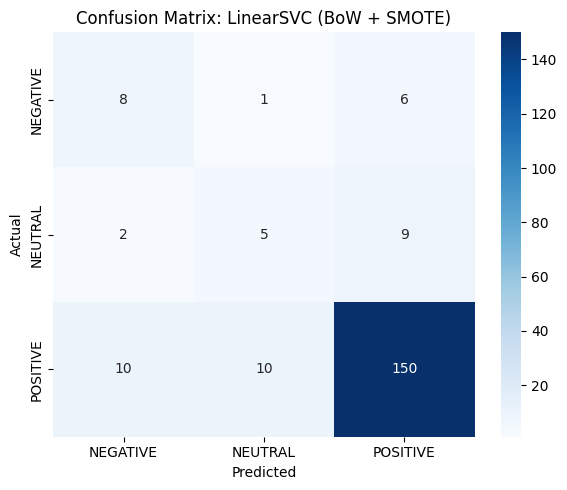

In [ ]:
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Features and target (using Bag of Words features)
X = df_BOW
y = data['Sentiment']

# Train/Test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train LinearSVC model
print("Training LinearSVC Model with SMOTE...")
lsvc_model = LinearSVC(class_weight='balanced', random_state=42)
lsvc_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_lsvc = lsvc_model.predict(X_test)

# Metrics
macro_f1_lsvc = f1_score(y_test, y_pred_lsvc, average='macro')
accuracy_lsvc = accuracy_score(y_test, y_pred_lsvc)

# Output
print(f"\n✅ LinearSVC (BoW + SMOTE) - Macro F1: {macro_f1_lsvc:.4f}")
print(f"✅ LinearSVC (BoW + SMOTE) - Accuracy: {accuracy_lsvc:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lsvc))

# Confusion Matrix
cm_lsvc = confusion_matrix(y_test, y_pred_lsvc, labels=lsvc_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lsvc, annot=True, fmt='d', cmap='Blues', xticklabels=lsvc_model.classes_, yticklabels=lsvc_model.classes_)
plt.title("Confusion Matrix: LinearSVC (BoW + SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Model Building

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]

# Your target variable
y = data['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
    # Split data (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))

    # Multinomial Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))

# Sort results by F1 score (descending)
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")





📊 Model Performance (Macro F1-scores):

RandomForest - N-gram         : Macro F1 = 0.5354
NaiveBayes - BoW              : Macro F1 = 0.5239
NaiveBayes - N-gram           : Macro F1 = 0.5231
RandomForest - BoW            : Macro F1 = 0.4818
RandomForest - TF-IDF         : Macro F1 = 0.4658
NaiveBayes - TF-IDF           : Macro F1 = 0.3035



✅ Best Model: RandomForest - N-gram (Macro F1 = 0.5354)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.25      0.38        16
     NEUTRAL       1.00      0.18      0.30        17
    POSITIVE       0.87      0.99      0.93       168

    accuracy                           0.87       201
   macro avg       0.89      0.47      0.54       201
weighted avg       0.87      0.87      0.83       201



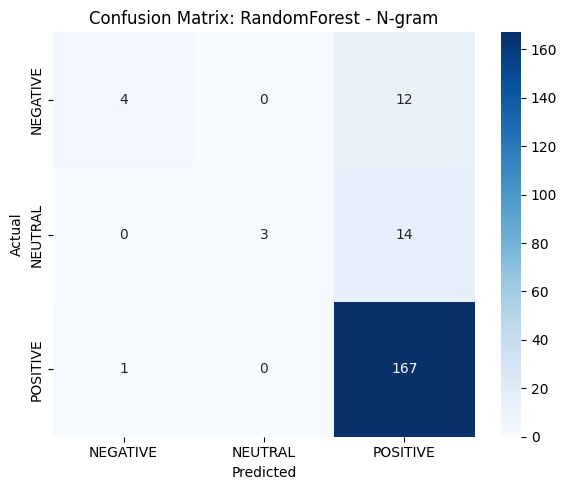

In [ ]:
# Best model
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]

print(f"\n✅ Best Model: {best_model_label} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Conclusion

 * Analyzed the distribution of customer sentiments.

 * Applied text preprocessing techniques to clean raw review data.

 * Vectorized the text using 3 different techniques and trained a Random Forest model & Naive Baye's Model

 * Achieved an macro F1 score of 0.57 on the test dataset.

 * Future improvements include hyperparameter tuning or trying alternative models for better performance.

### Recommendations:

*   Use model predictions to identify customer concerns and take timely,
targeted actions—reducing revenue loss and improving satisfaction.
*   Leverage sentiment insights to refine marketing strategies:


*   Showcase positive feedback in promotions to strengthen brand image.

* Use neutral/negative feedback to guide inventory and operational

decisions.





<font size=6 color='blue'>Thanks...</font>
___

In [ ]:

# Additional models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# SMOTE for class balancing
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import f1_score

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Target variable
y = data['Sentiment']  # Assuming 'Sentiment' is the label column

# Feature set (BoW already created)
X = df_BOW


In [ ]:

# Train/Test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [ ]:

models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'NaiveBayes': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'LinearSVC': LinearSVC(class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = []

for model_name, model in models.items():
    try:
        model.fit(X_train_sm, y_train_sm)
        preds = model.predict(X_test)
        macro_f1 = f1_score(y_test, preds, average='macro')
        results.append((model_name, macro_f1, model, preds))
        print(f"{model_name}: Macro F1 = {macro_f1:.4f}")
    except Exception as e:
        print(f"❌ {model_name} failed: {e}")


RandomForest: Macro F1 = 0.4584
NaiveBayes: Macro F1 = 0.4863
LogisticRegression: Macro F1 = 0.5286
LinearSVC: Macro F1 = 0.5551
❌ XGBoost failed: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['NEGATIVE' 'NEUTRAL' 'POSITIVE']


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


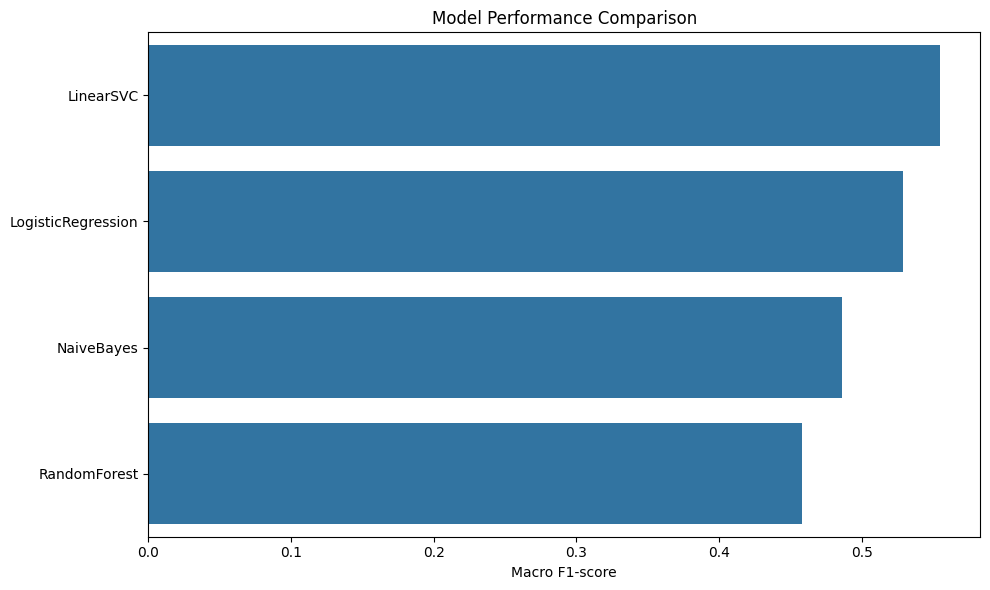

In [ ]:

# Sort by F1-score
results.sort(key=lambda x: x[1], reverse=True)

# Plot
model_names = [r[0] for r in results]
f1_scores = [r[1] for r in results]

plt.figure(figsize=(10,6))
sns.barplot(x=f1_scores, y=model_names)
plt.xlabel("Macro F1-score")
plt.title("Model Performance Comparison")
plt.tight_layout()
plt.show()



✅ Best Model: LinearSVC (Macro F1 = 0.5551)

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.40      0.53      0.46        15
     NEUTRAL       0.31      0.31      0.31        16
    POSITIVE       0.91      0.88      0.90       170

    accuracy                           0.81       201
   macro avg       0.54      0.58      0.56       201
weighted avg       0.82      0.81      0.82       201



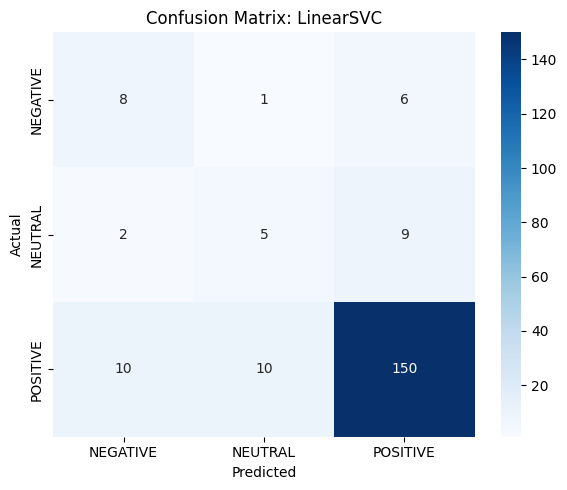

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

best_model_name, best_f1, best_model, best_preds = results[0]

print(f"\n✅ Best Model: {best_model_name} (Macro F1 = {best_f1:.4f})\n")
print("Classification Report:\n")
print(classification_report(y_test, best_preds))

# Confusion matrix
cm = confusion_matrix(y_test, best_preds, labels=best_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


📋 Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.44      0.44      0.44        16
     NEUTRAL       0.24      0.24      0.24        17
    POSITIVE       0.90      0.90      0.90       168

    accuracy                           0.81       201
   macro avg       0.52      0.52      0.52       201
weighted avg       0.81      0.81      0.81       201


📊 Macro F1 Score: 0.5239


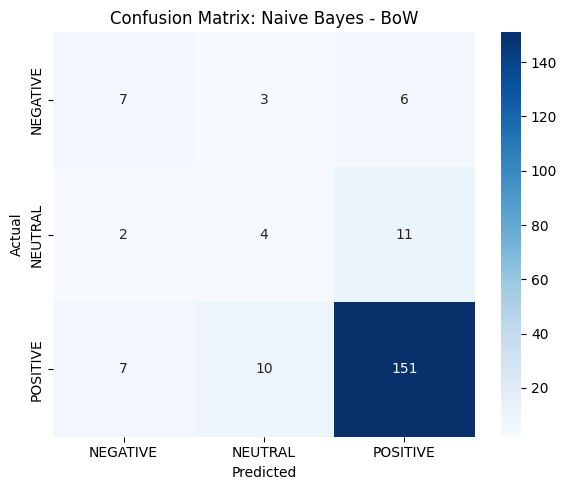

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Feature matrix and target variable
X = df_BOW              # BoW vectorized features
y = data['Sentiment']     # Sentiment labels

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Step 3: Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = nb_model.predict(X_test)

# Step 5: Classification report
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 6: Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n📊 Macro F1 Score: {macro_f1:.4f}")

# Step 7 (Optional): Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix: Naive Bayes - BoW")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score

models = {
    "RandomForest": RandomForestClassifier(random_state=100),
    "NaiveBayes": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📌 Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1 Score: {macro_f1:.4f}")



📌 Classification Report for RandomForest:
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.12      0.22        16
     NEUTRAL       1.00      0.18      0.30        17
    POSITIVE       0.86      1.00      0.92       168

    accuracy                           0.86       201
   macro avg       0.95      0.43      0.48       201
weighted avg       0.88      0.86      0.81       201

Macro F1 Score: 0.4818

📌 Classification Report for NaiveBayes:
              precision    recall  f1-score   support

    NEGATIVE       0.44      0.44      0.44        16
     NEUTRAL       0.24      0.24      0.24        17
    POSITIVE       0.90      0.90      0.90       168

    accuracy                           0.81       201
   macro avg       0.52      0.52      0.52       201
weighted avg       0.81      0.81      0.81       201

Macro F1 Score: 0.5239

📌 Classification Report for LogisticRegression:
              precision    recall  f1-score   support

    

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Features and target
X = df_BOW
y = data['Sentiment']  # Use 'Sentiment' from the 'data' DataFrame

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Metrics
macro_f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

# Output
print(f"✅ Gradient Boosting (BoW) - Macro F1: {macro_f1:.4f}")
print(f"✅ Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

✅ Gradient Boosting (BoW) - Macro F1: 0.5016
✅ Accuracy: 0.8706

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.50      0.16      0.24        19
     NEUTRAL       0.50      0.25      0.33         8
    POSITIVE       0.89      0.98      0.93       174

    accuracy                           0.87       201
   macro avg       0.63      0.46      0.50       201
weighted avg       0.84      0.87      0.84       201



In [ ]:
from sklearn.utils import resample

# Combine features and labels
df_bow = df_BOW.copy()
df_bow['Sentiment'] = df['Sentiment']

# Upsample minority classes
df_minority_1 = resample(df_bow[df_bow['Sentiment'] == 'NEGATIVE'], replace=True, n_samples=100, random_state=42)
df_minority_2 = resample(df_bow[df_bow['Sentiment'] == 'NEUTRAL'], replace=True, n_samples=100, random_state=42)
df_majority = df_bow[df_bow['Sentiment'] == 'POSITIVE']

# Combine back
df_balanced = pd.concat([df_minority_1, df_minority_2, df_majority])
X = df_balanced.drop('Sentiment', axis=1)
y = df_balanced['Sentiment']

# Now train any model


Training Gradient Boosting Model...

✅ Gradient Boosting (TF-IDF) - Macro F1: 0.4516
✅ Gradient Boosting (TF-IDF) - Accuracy: 0.8557

Gradient Boosting Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.67      0.11      0.18        19
     NEUTRAL       0.25      0.25      0.25         8
    POSITIVE       0.88      0.97      0.92       174

    accuracy                           0.86       201
   macro avg       0.60      0.44      0.45       201
weighted avg       0.84      0.86      0.83       201


Training XGBoost Model...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:50:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost (TF-IDF) - Macro F1: 0.4808
✅ XGBoost (TF-IDF) - Accuracy: 0.8607

XGBoost Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.60      0.16      0.25        19
     NEUTRAL       0.29      0.25      0.27         8
    POSITIVE       0.89      0.97      0.93       174

    accuracy                           0.86       201
   macro avg       0.59      0.46      0.48       201
weighted avg       0.84      0.86      0.84       201



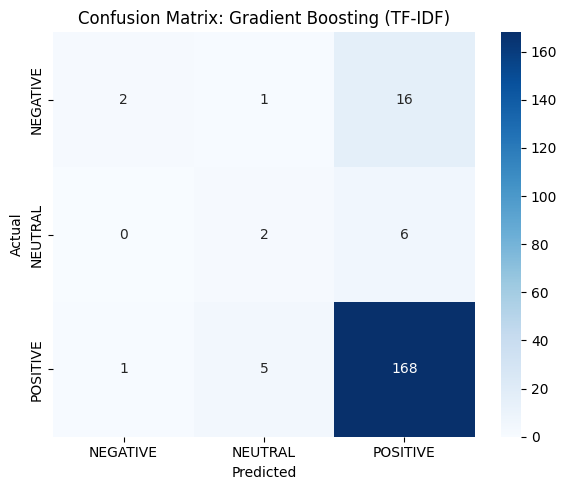

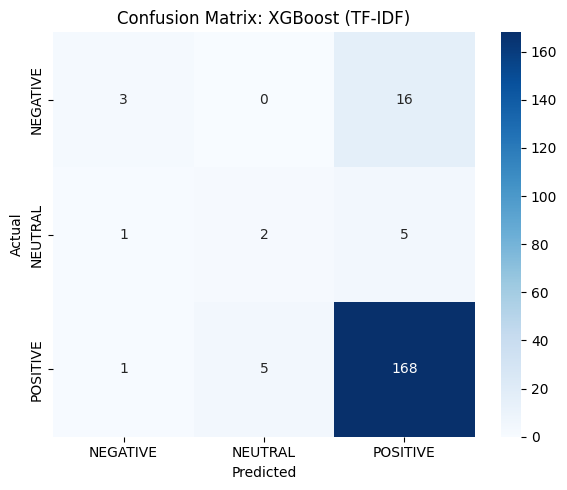

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = df_tfidf  # Use TF-IDF vectorized features
y = data['Sentiment']  # Use 'Sentiment' from the 'data' DataFrame

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
print("Training Gradient Boosting Model...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and metrics for Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
macro_f1_gb = f1_score(y_test, y_pred_gb, average='macro')
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Output for Gradient Boosting
print(f"\n✅ Gradient Boosting (TF-IDF) - Macro F1: {macro_f1_gb:.4f}")
print(f"✅ Gradient Boosting (TF-IDF) - Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting Classification Report:\n")
print(classification_report(y_test, y_pred_gb))

# Train XGBoost
print("\nTraining XGBoost Model...")
# XGBoost requires numerical labels, so map them
label_map = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
y_train_numeric = y_train.map(label_map)
y_test_numeric = y_test.map(label_map)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_numeric)

# Predictions and metrics for XGBoost
y_pred_xgb_numeric = xgb_model.predict(X_test)
# Map numeric predictions back to original labels for classification report
y_pred_xgb_labels = pd.Series(y_pred_xgb_numeric).map({v: k for k, v in label_map.items()})


macro_f1_xgb = f1_score(y_test_numeric, y_pred_xgb_numeric, average='macro')
accuracy_xgb = accuracy_score(y_test_numeric, y_pred_xgb_numeric)


# Output for XGBoost
print(f"\n✅ XGBoost (TF-IDF) - Macro F1: {macro_f1_xgb:.4f}")
print(f"✅ XGBoost (TF-IDF) - Accuracy: {accuracy_xgb:.4f}")
print("\nXGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb_labels))

# Optional: Confusion Matrices

# Confusion Matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=gb_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.title("Confusion Matrix: Gradient Boosting (TF-IDF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test_numeric, y_pred_xgb_numeric, labels=sorted(y_test_numeric.unique())) # Use sorted numeric labels for confusion matrix
plt.figure(figsize=(6, 5))
# Use original labels for xticklabels and yticklabels based on the sorted numeric labels
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=[k for k, v in sorted(label_map.items(), key=lambda item: item[1])], yticklabels=[k for k, v in sorted(label_map.items(), key=lambda item: item[1])])
plt.title("Confusion Matrix: XGBoost (TF-IDF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Task
Optimize the current best model (LinearSVC with BoW and SMOTE) and explore other models and vectorizations to achieve a macro F1 score greater than 0.60.

## Hyperparameter tuning

### Subtask:
Optimize the hyperparameters of the current best model (LinearSVC with BoW and SMOTE) using techniques like GridSearchCV or RandomizedSearchCV.


**Reasoning**:
I will define a parameter grid for LinearSVC, initialize GridSearchCV, fit it on the SMOTE-resampled training data, and evaluate the best model on the test set to optimize the hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score
import pandas as pd

# Define the parameter grid for LinearSVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'] # hinge is for SVC, squared_hinge for LinearSVC
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LinearSVC(class_weight='balanced', random_state=42),
                           param_grid,
                           scoring='f1_macro',
                           cv=5, # 5-fold cross-validation
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV on the SMOTE-resampled training data
print("Performing Grid Search for LinearSVC hyperparameters...")
grid_search.fit(X_train_sm, y_train_sm)

# Get the best model from the grid search
best_lsvc_model = grid_search.best_estimator_

print(f"\nBest hyperparameters found: {grid_search.best_params_}")

# Evaluate the best model on the original test set
print("\nEvaluating the best LinearSVC model on the test set...")
y_pred_best_lsvc = best_lsvc_model.predict(X_test)

# Print classification report
print("\nClassification Report (Best LinearSVC):\n")
print(classification_report(y_test, y_pred_best_lsvc))

# Print macro F1 score
macro_f1_best_lsvc = f1_score(y_test, y_pred_best_lsvc, average='macro')
print(f"\n✅ Best LinearSVC (BoW + SMOTE + Tuned) - Macro F1: {macro_f1_best_lsvc:.4f}")


Performing Grid Search for LinearSVC hyperparameters...

Best hyperparameters found: {'C': 10, 'loss': 'squared_hinge'}

Evaluating the best LinearSVC model on the test set...

Classification Report (Best LinearSVC):

              precision    recall  f1-score   support

    NEGATIVE       0.32      0.40      0.35        15
     NEUTRAL       0.28      0.31      0.29        16
    POSITIVE       0.90      0.86      0.88       170

    accuracy                           0.79       201
   macro avg       0.50      0.53      0.51       201
weighted avg       0.80      0.79      0.79       201


✅ Best LinearSVC (BoW + SMOTE + Tuned) - Macro F1: 0.5091


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
